In [0]:
# Fill in your name using the format below and student ID number
your_name = "KERKOC, MATIJA"
student_id = "1550446"

In [0]:
# Before submission, set this to True so that you can render and verify this notebook without training deep learning models.
# Any deep learning models will be trained from file instead.
stop_training = True

In [0]:
# Uncomment the following line to run in Google Colab
## !pip install --quiet openml 

In [4]:
# Uncomment the following line to run in Google Colab
## %tensorflow_version 2.x
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU') # Check whether GPUs are available

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [0]:
%matplotlib inline
import openml as oml
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [6]:
from packaging import version
import sklearn
import tensorflow
sklearn_version = sklearn.__version__
tensorflow_version = tensorflow.__version__
if version.parse(sklearn_version) < version.parse("0.22.0"):
    print("scikit-learn is outdated. Please update now!")
if version.parse(tensorflow_version) < version.parse("2.1.0"):
    print("Tensorflow is outdated. This is version {}. Please update to 2.1.".format(tensorflow_version))
else:
    print("Hi{}, Looks good. You may continue :)".format(your_name.split(",")[1]))

Hi MATIJA, Looks good. You may continue :)


# Assignment 3

### Choice of libraries
We recommend to use Tensorflow in this assignment since that is what we covered in the labs. If you feel confident using PyTorch (and Skorch for the scikit-learn wrapper), that is allowed too, as long as you are able to implement the requested functions and return the requested data. Read the assignment carefully and ensure that you can. Note that you may also need to do a bit more work to implement certain helper functions and wrappers.

### Storing and submitting files
You must be able to store your models and submit them to GitHub Classroom. The evaluation functions used in this notebook will automatically store models for you.

If you want to run and solve the notebook on your local machine/laptop, fill in the path 'base_dir' to your assignment folder into the next cell.

If you use Colab, we recommend that you link it to your Google Drive:  
* Upload the assignment folder to your Google Drive (+ New > Folder Upload)
* Open Colab in a browser, open the 'Files' menu in the left sidebar, and click 'Mount Drive'
  * At this point you may need to authenticate
* Fill in the path to your assignment folder below
  * It's likely '/content/drive/My Drive/assignment-3-yourname'

In [0]:
## base_dir = '/content/drive/My Drive/assignment-3-kerkocmatija' # For Google Colab
base_dir = './'

In [8]:
#Uncomment to link Colab notebook to Google Drive
## from google.colab import drive
## drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Using GPUs
While you can solve this assignment on a CPU, using a GPU will speed things up training quite a bit. If you have a local GPU, you can use that. If you don't, we recommend Google Colab. When you are in Colab:
* In Runtime > Change runtime type, select the GPU under Hardware Accelerator
* Run the 3rd cell on the top of this notebook to check that the GPU is found.

Note that Colab may not always have GPUs ready all the time, and may deny you a GPU when you have used them a lot. When you are temporarily 'locked out', you can switch to a non-GPU runtime or to a local instance of Jupyter running on your machine.

### Constraints
* Your stored models should not be larger than 100MB when stored in file. GitHub will not allow uploading if they are.
* When questions ask you to provide an explanation, it should be less than 500
characters long. Some questions have a higher limit. Always answer in full sentences.
* Don't train for more than 100 epochs, i.e. don't throw excessing computational resources at the problem. If your model hasn't converged by then, think of ways it could be made to converge faster. In this assignment you are not after the last tiny improvement, you can stop when learning curves flatten out. Do at least 5 epochs to get a reasonable learning curve.

### Grading
Grading is based on the following aspects:
* Correctness in answering the question. Carefully read the question and answer
what is asked for. Train your models on the correct data. It should be clear on which data should be trained, but ask when in doubt. When something is not defined (e.g. the number of epochs or batch size), you can freely choose them.
* Clarity of your explanations. Write short but precise descriptions of what you did and why. Give short but clear explanations of the observed performance. 
After your explanation, your approach and model should make perfect sense. Refrain from using symbols as substitute for words in your explanation (e.g. no: "More layers -> more parameters" yes: "More layers mean more parameters"). 
* Part of your grade depends on how well your model performs. When the question says 'you should at least get x%', x% will give you a good but not the maximal grade. You can get the full grade when you are close to what is the expected maximal performance. You don't need to invest lots of effort into the last tiny improvement, though. Unless specified, we look at the accuracy on the validation set. If your learning curves are very erratic we'll compute a score based on the smoothed curves (i.e. single peaks don't count).
* The weight of each question is indicated. Take this into account when planning your time.

### Other tips
* Don't wait until the last minute to do the assignment. The models take time to train, most questions will require some thinking, and some require you to read up on some new concepts.
* Take care that you upload the results as requested. You need to submit not only the notebooks but also the trained models and learning curves (training histories). Be sure to run the verification script and check that all the results are included.
* We provide an evaluation function that also stored models to disk. After you are done training the model, set the 'train' attribute to False so that the model doesn't train again (and loads from file instead) when you restart and rerun your notebook.
* Explore. For many questions we'll ask you to explain your model design decisions. You cannot magically know the best solutions but you can experiment
based on your understanding and make decisions based on both your knowledge and experiments. Your explanation is at least as important as the performance of your model.
* Be original. We will check for plagiarism between student submissions.

### Data
The [Street View House Numbers Dataset](https://www.openml.org/d/41081) contains 32-by-32 RGB images centered around a single digit of a house number appearing in Google Street View. Many of the images do contain some distractors at the sides. It consists of 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10. Your goal is to build models that recognize the correct digit.

If you use Colab, uncomment the following to cache the dataset inside the VM. This will make reloading faster if you need to restart your notebook. After longer periods of inactivity, your VM may be recycled and the cache lost, in which case the dataset will be downloaded again. Also note that this dataset is about 1Gb large, and will take even more space in memory. You may need to switch to a high-RAM environment (Colab will ask you if you hit the limit).

In [0]:
# Use OpenML caching in Colab
# On your local machine, it will store data in a hidden folder '~/.openml'
## import os
## oml.config.cache_directory = os.path.expanduser('/content/cache')

In [0]:
# Download Streetview data. Takes a while (several minutes), and quite a bit of
# memory when it needs to download. After caching it loads faster.
SVHN = oml.datasets.get_dataset(41081)
X, y, _, _ = SVHN.get_data(dataset_format='array',
    target=SVHN.default_target_attribute)

Reshape, sample and split the data

In [0]:
from tensorflow.keras.utils import to_categorical

Xr = X.reshape((len(X),32,32,3))
Xr = Xr / 255.
yr = to_categorical(y)

In [0]:
# DO NOT EDIT. DO NOT OVERWRITE THESE VARIABLES.
from sklearn.model_selection import train_test_split
# We do an 80-20 split for the training and test set, and then again a 80-20 split into training and validation data
X_train_all, X_test, y_train_all, y_test = train_test_split(Xr,yr, stratify=yr, train_size=0.8, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_all,y_train_all, stratify=y_train_all, train_size=0.8, random_state=1)
evaluation_split = X_train, X_val, y_train, y_val

Check the formatting - and what the data looks like

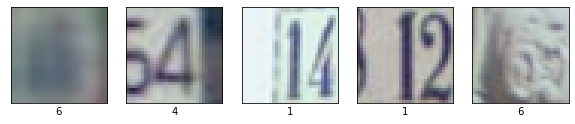

In [13]:
from random import randint

# Takes a list of row ids, and plots the corresponding images
# Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
    for n in range(len(X)):
        if grayscale:
            axes[n].imshow(X[n], cmap='gray')
        else:
            axes[n].imshow(X[n])
        axes[n].set_xlabel((np.argmax(y[n])+1)%10) # Label is index+1
        axes[n].set_xticks(()), axes[n].set_yticks(())
    plt.show();

images = [randint(0,len(X_train)) for i in range(5)]
X_random = [X_train[i] for i in images]
y_random = [y_train[i] for i in images]
plot_images(X_random, y_random)

### Evaluation harness
We provide an evaluation function 'run_evaluation' that you should use to 
evaluate all your models. It also stores the trained models to disk so that
your submission can be quickly verified, as well as to avoid having to train
them over and over again. Your last run of the evaluation function (the last one
stored to file), is the one that will be evaluated. The 'train' argument indicates whether to train or to load from disk. We have provided helper functions for saving and loading models to/from file, assuming you use TensorFlow. If you use PyTorch you'll have to adapt them.

In [0]:
import os
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model # for use with tensorflow

def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')

def load_model_from_file(base_dir, name, extension='.h5'):
    """ Loads a model from a file. The returned model must have a 'fit' and 'summary'
    function following the Keras API. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    base_dir -- Directory where the models are stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    try:
        model = load_model(os.path.join(base_dir, name+extension))
    except OSError:
        shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
        return False
    return model

def save_model_to_file(model, base_dir, name, extension='.h5'):
    """ Saves a model to file. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    model -- the model to be saved
    base_dir -- Directory where the models should be stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    model.save(os.path.join(base_dir, name+extension))

# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# DO NOT EDIT
def run_evaluation(name, model_builder, data, base_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Training the model", verbose)
        if generator:
            generator, X_val, y_val = data
            history = model.fit(generator, epochs=epochs, batch_size=batch_size,
                              steps_per_epoch=steps_per_epoch, verbose=1, 
                              validation_data=(X_val, y_val))
            learning_curves = history.history
        else:
            X_train, X_val, y_train, y_val = data
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                              verbose=1, validation_data=(X_val, y_val))
            learning_curves = history.history
        shout("Saving to file", verbose)
        save_model_to_file(model, base_dir, name)
        with open(os.path.join(base_dir, name+'.p'), 'wb') as file_pi:
            pickle.dump(learning_curves, file_pi)
        shout("Model stored in "+base_dir, verbose)
    else: # Load from file
        shout("Loading model from file", verbose)
        model = load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
        shout("Success!", verbose)
    # Report
    print(model.summary())
    lc = pd.DataFrame(learning_curves)
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    print(lc.apply(minMax))

## Part 1. Dense networks (10 points)

### Question 1.1: Baseline model (4 points)
- Build a dense network (with only dense layers) of at least 3 layers that is shaped like a pyramid: The first layer must have many nodes, and every subsequent layer must have increasingly fewer nodes, e.g. half as many. Implement a function 'build_model_1_1' that returns this model.
- You can explore different settings, but don't use any preprocessing or regularization yet. You should be able to achieve at least 70% accuracy, but more is of course better. Unless otherwise stated, you can use accuracy as the evaluation metric in all questions.
* Add a small description of your design choices (max. 500 characters) in 'answer_q_1_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- The name of the model should be 'model_1_1'. Evaluate it using the 'run_evaluation' function. For this question, you should not use more than 50 epochs.

Loading model from file
Success!
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
flatten_6 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_40 (Dense)             (None, 128)               3686528   
_________________________________________________________________
dense_41 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_42 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_43 (Dense)             (None, 10)                330       
Total params: 3,698,090
Trainable params: 3,698,090
Non-trainable params: 0
__________

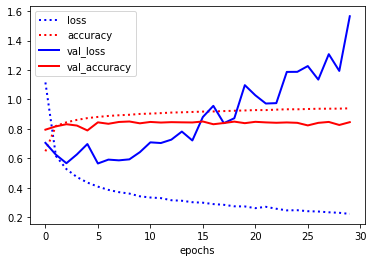

In [15]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

def build_model_1_1():
  "Function that builds a model with 3 pyramid-shaped dense layers. No regularization or preprocessing yet."

  # Construct a model and add the 3 dense layers (+ input and output layer)
  model_1_1 = models.Sequential()
  model_1_1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model_1_1.add(layers.Flatten())
  model_1_1.add(layers.Dense(128, activation='relu'))
  model_1_1.add(layers.Dense(64, activation='relu'))
  model_1_1.add(layers.Dense(32, activation='relu'))
  model_1_1.add(layers.Dense(10, activation='softmax'))

  # Now we compile our model
  model_1_1.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

  return model_1_1
  ##################################################################
run_evaluation("model_1_1", build_model_1_1, evaluation_split, base_dir, 
               train=False, epochs=30, batch_size=32)
answer_q_1_1 = """I tried all possible 3-ples and 4-ples of dense layers from 
(1024,_,_) and (1024,_,_,_) down, both with 32 and 64 batches. Best val_acc I got 
was around 0.85 for models (1024,512,128,64), (512,256,32) and (128,64,32), 
so I decided to take last one. All models start overfitting after few (5) epochs 
and after 10 epochs val_loss just goes crazy. I also tried 64 and 128 batches, but looks like 32 
was the best. I think, that for such 'simple', not tuned model, it works quite ok."""

print("Answer is {} characters long".format(len(answer_q_1_1)))

### Question 1.2: Preprocessing (2 points)
Rerun the model, but now preprocess the data first by converting the images to 
greyscale. You can use the helper function below. If you want to do additional 
preprocessing, you can do that here, too.
* Store the preprocessed data as a tuple `preprocessed_split`
* Rerun and re-evaluate your model using the preprocessed data.
  * For the remainder of the assignment, always use the preprocessed data
* Explain what you did and interpret the results in 'answer_q_1_2'. Is the model
  better, if so, why?

In [0]:
# Luminance-preserving RGB to greyscale conversion
def rgb2gray(X):
    return np.expand_dims(np.dot(X, [0.2990, 0.5870, 0.1140]), axis=3)

Loading model from file
Success!
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
flatten_1 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               3686528   
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
Total params: 3,697,514
Trainable params: 3,697,514
Non-trainable params: 0
___________

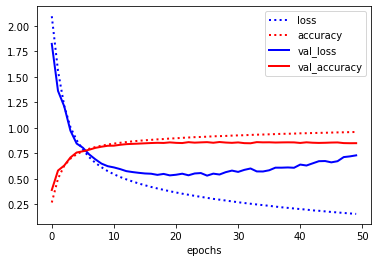

In [17]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

# First we preprocess the data to the greyscale
preprocessed_split = (rgb2gray(X_train), rgb2gray(X_val), y_train, y_val)

# Building the new model
def build_model_1_2():
  # Construct a model and add the layers
  model_1_2 = models.Sequential()
  model_1_2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
  model_1_2.add(layers.Flatten())
  model_1_2.add(layers.Dense(128, activation='relu'))
  model_1_2.add(layers.Dense(64, activation='relu'))
  model_1_2.add(layers.Dense(32, activation='relu'))
  model_1_2.add(layers.Dense(10, activation='softmax'))

  # Now we compile our model
  model_1_2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

  return model_1_2

# Evaluate. Use a new name 'model_1_2' to not overwrite the previous trained model
run_evaluation("model_1_2", build_model_1_2, preprocessed_split, base_dir, 
               train=False, epochs=50, batch_size=32)
answer_q_1_2 = """Model works better. Val_acc only gets better for 1-2%, but val_loss
gets a lot smaller and our model starts overfitting only after cca.20 epochs, and even then 
val_loss only increases slowly. So, it makes sense to preprocess the data, FOR THAT SPECIFIC PROBLEM!
Because colors are not important for digit classification (thea only disrupt our model), 
but if we have pictures for example of animals, we want to keep the colors, 
because they do cary some additional information."""
print("Answer is {} characters long".format(len(answer_q_1_2)))

### Question 1.3: Regularization and tuning (4 points)
* Regularize the model. You can explore (and combine) different techniques. What works best?
* Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
* Explain your findings and final design decisions. Retrain the model again on the preprocessed data and discuss the results.
* Return your model in function 'build_model_1_3' and write your answer in 'answer_q_1_3'

Loading model from file
Success!
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
flatten_3 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               3686528   
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
batch_normalization_4

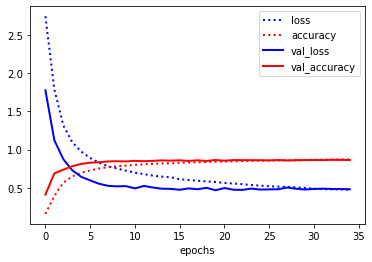

In [18]:
def build_model_1_3():
  # Construct a model and add the layers
  model_1_3 = models.Sequential()
  model_1_3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
  model_1_3.add(layers.Flatten())
  model_1_3.add(layers.Dense(128, activation='relu'))
  model_1_3.add(layers.BatchNormalization())
  model_1_3.add(layers.Dropout(0.3))
  model_1_3.add(layers.Dense(64, activation='relu'))
  model_1_3.add(layers.BatchNormalization())
  model_1_3.add(layers.Dropout(0.4))
  model_1_3.add(layers.Dense(32, activation='relu'))
  model_1_3.add(layers.BatchNormalization())
  model_1_3.add(layers.Dropout(0.5))
  model_1_3.add(layers.Dense(10, activation='softmax'))

  # Now we compile our model
  model_1_3.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

  return model_1_3

#######################################
run_evaluation("model_1_3", build_model_1_3, preprocessed_split, base_dir, 
               train=False, epochs=35, batch_size=32)
answer_q_1_3 = """I decided to have 3 dense layers, because seems like optimal (they are 
pretty small, but work fine). I addded pooling to extract more important regions. Then I added 
BatchNormalization to increase stability and normalize the outputs. I added Dropout at different 
rates, to force model to learn more 'deeply into the netwoork'. I left other parameters more 
or less the same. Model works better, we are around the 86% val_acc, val_loss is stabilized 
even after 35 epoch, then starts overfitting."""
print("Answer is {} characters long".format(len(answer_q_1_3)))

## Part 2. Convolutional neural networks (10 points)
### Question 2.1: Design a ConvNet (7 points)
- Build a sequential convolutional neural network. Try to achieve the best validation accuracy you can. You should be able to get at least 90% accuracy. You can use any depth, any combination of layers, and any kind of regularization and tuning. 
- Add a description of your design choices in 'answer_q_2_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- You are allowed **800** characters for this answer (but don’t ramble).
- The name of the model should be 'model_2_1'. Evaluate it using the 'run_evaluation' function and the preprocessed data.

Loading model from file
Success!
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization_4 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)    

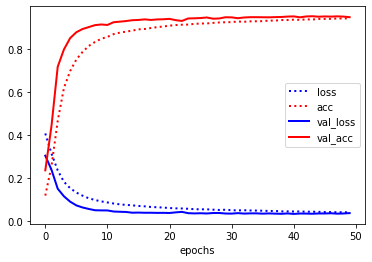

In [19]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

preprocessed_split = rgb2gray(X_train), rgb2gray(X_val), y_train, y_val
def build_model_2_1():
  
  model_2_1 = models.Sequential()
  model_2_1.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 1)))
  model_2_1.add(layers.BatchNormalization())
  model_2_1.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
  model_2_1.add(layers.BatchNormalization())
  model_2_1.add(layers.MaxPooling2D((2, 2)))
  model_2_1.add(layers.Dropout(0.2))
  model_2_1.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model_2_1.add(layers.BatchNormalization())
  model_2_1.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model_2_1.add(layers.BatchNormalization())
  model_2_1.add(layers.MaxPooling2D((2, 2)))
  model_2_1.add(layers.Dropout(0.3))
  model_2_1.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
  model_2_1.add(layers.BatchNormalization())
  model_2_1.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
  model_2_1.add(layers.BatchNormalization())
  model_2_1.add(layers.MaxPooling2D((2, 2)))
  model_2_1.add(layers.Dropout(0.4))

  model_2_1.add(layers.Flatten())
  model_2_1.add(layers.Dense(128, activation='relu'))
  model_2_1.add(layers.BatchNormalization())
  model_2_1.add(layers.Dropout(0.5))
  model_2_1.add(layers.Dense(64, activation='relu'))
  model_2_1.add(layers.BatchNormalization())
  model_2_1.add(layers.Dropout(0.5))
  model_2_1.add(layers.Dense(32, activation='relu'))
  model_2_1.add(layers.BatchNormalization())
  model_2_1.add(layers.Dropout(0.5))
  model_2_1.add(layers.Dense(10, activation='softmax'))

  # Now we compile our model
  model_2_1.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
  return model_2_1

#############################################
run_evaluation("model_2_1", build_model_2_1, preprocessed_split, base_dir, 
                train=False, epochs=50, batch_size=32)

answer_q_2_1 = """General idea here is to mimic some combination of already built models 
and example we did in labs. First, we add some convolutional layers (each smaller than previous) 
with normalization and pooling in between (choice for this is obvious and already described in 
question 1.3). We use padding='same', so we dont loose too much of a pictures. 
Then we increase dropout to force more regularization in deeper layers. 
Finaly we put dense layers (I tried and 3 is enough). We can get somewhere around 0.95 val_acc.
Also looks like that in this configuration of network, batch size 32 is best. 
I also tried 128 and 64. Model is working well, and we will see that most 
missclassifications are from bad quality pictures. Note, that model starts to overfit a bit after 
50 epochs(='sweet spot')."""

print("Answer is {} characters long".format(len(answer_q_2_1)))

### Question 2.2: Data Augmentation (3 points)

- Augment the preprocessed training data. You can explore using image shifts, rotations, zooming, flips, etc. What works well, and what does not?
- Evaluate the model from question 2.1 with the augmented data using the 'run_evaluation' function. Store the new trained model as 'model_2_2'.
- Add a description of your design choices in 'answer_q_2_2': explain what you did and also why. Also discuss the performance of the model.

Loading model from file
Success!
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)   

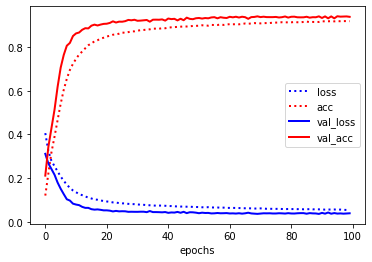

In [20]:
# Note that we build the same untrained model as in question 2.1 but store the 
# trained version as model_2_2. Change attributes as needed to run on augmented
# data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Extract preprocesed datas
X_train_pre, X_val_pre, y_train_pre, y_val_pre = preprocessed_split

# Define possible transformations
transformations = ImageDataGenerator(
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=False,
    vertical_flip=True,
    fill_mode='nearest'
)

# Transform train and validate data
data_trans = transformations.flow(X_train_pre, y_train_pre, batch_size=32)

# Re-pack everything back
augmented_split = (data_trans[0][0], X_val_pre, data_trans[0][1], y_val_pre)

#######################################################################
steps = int(X_train.shape[0] / 32)
run_evaluation("model_2_2", build_model_2_1, (data_trans, X_val_pre, y_val_pre),
               base_dir, generator=True, steps_per_epoch=steps, train=True,
               epochs=100, batch_size=32)

answer_q_2_2 = """No rotations, since we could mistake 7<->1. No horizontal_flip+vertical_flip, 
because of 6<->9. We dont want horizontal or vertical shift, because other numbers in the picture might 
come into focus (center). Also pictures are pretty grainy, so we want to keep augmentations MINIMAL. 
Val_Acc is still higher than acc, so it might be good idea to train a little. 
Also, we improve only slightly comparing to the model_2_1, because the dataset 
is pretty big and pictures are pretty bad quality, so augmentations rarely help."""

print("Answer is {} characters long".format(len(answer_q_2_2)))

## Part 3. Model interpretation (10 points)
### Question 3.1: Interpreting misclassifications (2 points)
Study which errors are still made by your last model (model_2_2) by evaluating it on the test data. You do not need to retrain the model.
* What is the accuracy of model_2_2 on the test data? Store this in 'test_accuracy_3_1'.
* Plot the confusion matrix in 'plot_confusion_matrix' and discuss which classes are often confused.
* Visualize the misclassifications in more depth by focusing on a single
class (e.g. the number '2') and analyse which kinds of mistakes are made for that class. For instance, are the errors related to the background, noisiness, etc.? Implement the visualization in 'plot_misclassifications'.
* Summarize your findings in 'answer_q_3_1'

621/621 [==============================] - 4s 6ms/step - loss: 0.0399 - acc: 0.9388


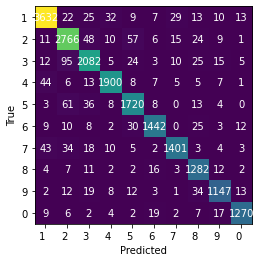

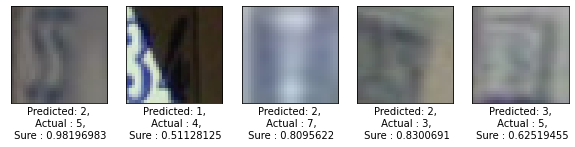

__________________________________________________________________________
Now plot the misclassifications for class 7.
Images predicted as 1, but are true 7:


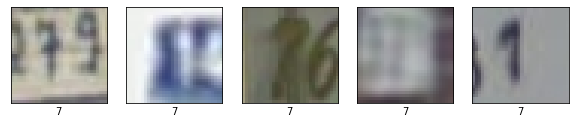

Obvious mistakes. 7s are just rotated and they look like 1s.
__________________________________________________________________________
Images predicted as 2, but are true 7:


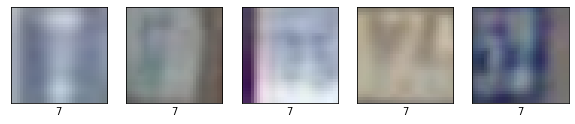

Pretty obvious. 7s are without middle line and have rounded upper corner,
so with a little noise on the lower part, they look like 2s.
__________________________________________________________________________
Images predicted as 3, but are true 7:


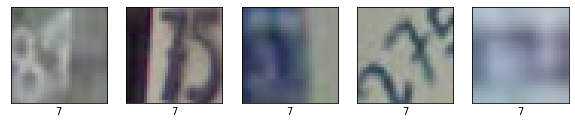

Again we can see 7s with middle line and rounded top, might look like 3s.
__________________________________________________________________________
Images predicted as 4, but are true 7:


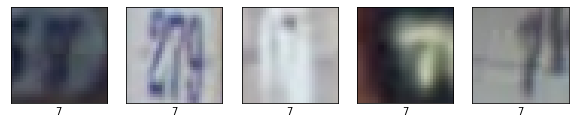

Again pretty obvious. 7s with middle line, might look like 4s.
__________________________________________________________________________
Images predicted as 5, but are true 7:


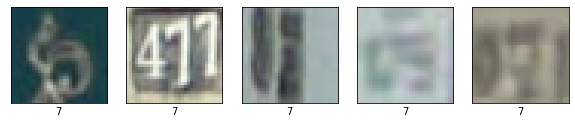

Interesting! Looks to me, that those are also misslabele, because second picture
sure looks like 5. But pictures are just too noisy and hard to learn on!
__________________________________________________________________________
Images predicted as 6, but are true 7:


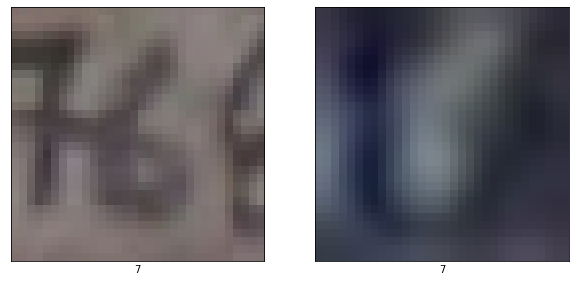

Interesting! Looks like, that both mistakes are there also 6s beside the 7s.
Looks like, that model payed attention to that part of picture.
__________________________________________________________________________
Images predicted as 8, but are true 7:


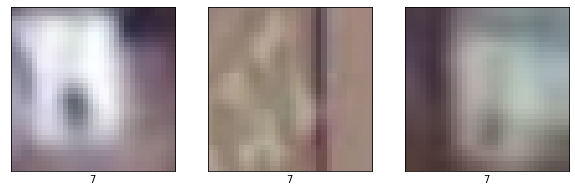

Ugh! Too noisy, impossible to see anything.
__________________________________________________________________________
Images predicted as 9, but are true 7:


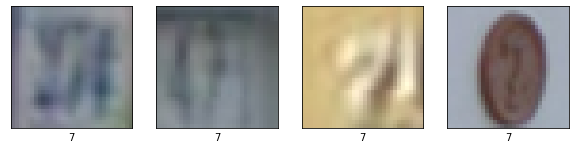

Well, 7s with allongated top line might look like 9s in some cases.
__________________________________________________________________________
Images predicted as 0, but are true 7:


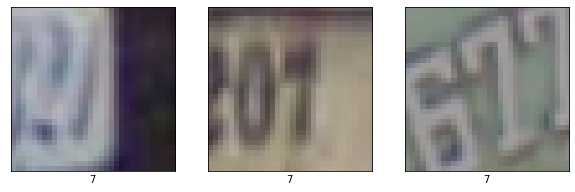

There is probably 0 alongside 7 on the picture.
__________________________________________________________________________
Answer is 496 characters long


In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from random import randint
import pandas as pd
import numpy as np

# Load pretrained model from file
model_mis = load_model_from_file(base_dir, 'model_2_2', extension='.h5')

# Evaluate it on the test data
model_mis.evaluate(rgb2gray(X_test), y_test)

test_accuracy_3_1 = 0.9399
################################################################################
# Parts of the code are also from the notebooks of Joaquin Vanschoren
y_pred = model_mis.predict(rgb2gray(X_test))
misclassified_samples = np.nonzero(np.argmax(y_test, axis=1) != np.argmax(y_pred, axis=1))[0]
# Function to plot confussion matrix
def plot_confusion_matrix():
  classes = {1: "1", 2: "2", 3: "3", 4: "4",
                 5: "5", 6: "6", 7: "7", 8: "8", 9: "9", 10: "0"}

  # Plotting confusion matrix
  cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

  fig, axes = plt.subplots()
  im = axes.imshow(cm)

  axes.set_xticks(np.arange(10)), axes.set_yticks(np.arange(10))
  axes.set_xticklabels(list(classes.values()), ha="right")
  axes.set_yticklabels(list(classes.values()))

  axes.set_ylabel('True') # Name of y label
  axes.set_xlabel('Predicted') # Name of x label 
  for i in range(100):
    axes.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")               

  return fig, axes
plot_confusion_matrix()

#### HELPER PLOTTING FUNCTION
def plot_images_2(X, y):
  fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
  for n, i in enumerate(misclassified_samples[:5]):
    axes[n].imshow(X[n])
    axes[n].set_xlabel("Predicted: %s,\n Actual : %s,\n Sure : %s" % ((np.argmax(y_pred[i])+1)%10,
                                                                            (np.argmax(y_test[i])+1)%10,
                                                                            (max(y_pred[i]))))
    axes[n].set_xticks(()), axes[n].set_yticks(())
  plt.show();


# SOMETHING IS WRONG WITH THE GRAY PLOTTING FUNCTION!!!
def plot_misclassifications():
  # plot_confusion_matrix()

  # We take indices of the misclassified pictures and feed them to almost same function
  # We do not want to mess with already definedd plot function 
  images = [misclassified_samples[0], misclassified_samples[1],
            misclassified_samples[2], misclassified_samples[3],
            misclassified_samples[4]]
  X_random_1 = [X_test[i] for i in images]
  y_random_1 = [y_test[i] for i in images]
  plot_images_2(X_random_1, y_random_1)

  ##################################################################################
  # WE WILL LOOK AT THE TRUE: '7' and its missclassifications. (Quite big sample).
  # Find inices for specific misclassified samples
  print('__________________________________________________________________________')
  print('Now plot the misclassifications for class 7.')
  true_7_but_1 = []
  for i in misclassified_samples:
    if (np.argmax(y_pred[i])+1)%10 == 1 and (np.argmax(y_test[i])+1)%10 == 7:
      true_7_but_1.append(i)
  if len(true_7_but_1) == 1:
    true_7_but_1.append(true_7_but_1[0])
  true_7_but_1[:5]
  X_but_1 = [X_test[i] for i in true_7_but_1[:5]]
  y_but_1 = [y_test[i] for i in true_7_but_1[:5]]
  print('Images predicted as 1, but are true 7:')
  plot_images(X_but_1, y_but_1)
  print('Obvious mistakes. 7s are just rotated and they look like 1s.')
  print('__________________________________________________________________________')
################################################################################
  true_7_but_2 = []
  for i in misclassified_samples:
    if (np.argmax(y_pred[i])+1)%10 == 2 and (np.argmax(y_test[i])+1)%10 == 7:
      true_7_but_2.append(i)
  if len(true_7_but_2) == 1:
    true_7_but_2.append(true_7_but_2[0])
  true_7_but_2[:5]
  X_but_2 = [X_test[i] for i in true_7_but_2[:5]]
  y_but_2 = [y_test[i] for i in true_7_but_2[:5]]
  print('Images predicted as 2, but are true 7:')
  plot_images(X_but_2, y_but_2)
  print('Pretty obvious. 7s are without middle line and have rounded upper corner,')
  print('so with a little noise on the lower part, they look like 2s.')
  print('__________________________________________________________________________')
################################################################################
  true_7_but_3 = []
  for i in misclassified_samples:
    if (np.argmax(y_pred[i])+1)%10 == 3 and (np.argmax(y_test[i])+1)%10 == 7:
      true_7_but_3.append(i)
  if len(true_7_but_3) == 1:
    true_7_but_3.append(true_7_but_3[0])      
  true_7_but_3[:5]
  X_but_3 = [X_test[i] for i in true_7_but_3[:5]]
  y_but_3 = [y_test[i] for i in true_7_but_3[:5]]
  print('Images predicted as 3, but are true 7:')
  plot_images(X_but_3, y_but_3)
  print('Again we can see 7s with middle line and rounded top, might look like 3s.')
  print('__________________________________________________________________________')
################################################################################
  true_7_but_4 = []
  for i in misclassified_samples:
    if (np.argmax(y_pred[i])+1)%10 == 4 and (np.argmax(y_test[i])+1)%10 == 7:
      true_7_but_4.append(i)
  if len(true_7_but_4) == 1:
    true_7_but_4.append(true_7_but_4[0])
  true_7_but_4[:5]
  X_but_4 = [X_test[i] for i in true_7_but_4[:5]]
  y_but_4 = [y_test[i] for i in true_7_but_4[:5]]
  print('Images predicted as 4, but are true 7:')
  plot_images(X_but_4, y_but_4)
  print('Again pretty obvious. 7s with middle line, might look like 4s.')
  print('__________________________________________________________________________')
################################################################################
  true_7_but_5 = []
  for i in misclassified_samples:
    if (np.argmax(y_pred[i])+1)%10 == 5 and (np.argmax(y_test[i])+1)%10 == 7:
      true_7_but_5.append(i)
  if len(true_7_but_5) == 1:
    true_7_but_5.append(true_7_but_5[0])
  true_7_but_5[:5]
  X_but_5 = [X_test[i] for i in true_7_but_5[:5]]
  y_but_5 = [y_test[i] for i in true_7_but_5[:5]]
  print('Images predicted as 5, but are true 7:')
  plot_images(X_but_5, y_but_5)
  print('Interesting! Looks to me, that those are also misslabele, because second picture')
  print('sure looks like 5. But pictures are just too noisy and hard to learn on!')
  print('__________________________________________________________________________')
################################################################################
  true_7_but_6 = []
  for i in misclassified_samples:
    if (np.argmax(y_pred[i])+1)%10 == 6 and (np.argmax(y_test[i])+1)%10 == 7:
      true_7_but_6.append(i)
  if len(true_7_but_6) == 1:
    true_7_but_6.append(true_7_but_6[0])
  true_7_but_6[:5]
  X_but_6 = [X_test[i] for i in true_7_but_6[:5]]
  y_but_6 = [y_test[i] for i in true_7_but_6[:5]]
  print('Images predicted as 6, but are true 7:')
  plot_images(X_but_6, y_but_6)
  print('Interesting! Looks like, that both mistakes are there also 6s beside the 7s.')
  print('Looks like, that model payed attention to that part of picture.')
  print('__________________________________________________________________________')
################################################################################
  true_7_but_8 = []
  for i in misclassified_samples:
    if (np.argmax(y_pred[i])+1)%10 == 8 and (np.argmax(y_test[i])+1)%10 == 7:
      true_7_but_8.append(i)
  if len(true_7_but_8) == 1:
    true_7_but_8.append(true_7_but_8[0])
  true_7_but_8[:5]
  X_but_8 = [X_test[i] for i in true_7_but_8[:5]]
  y_but_8 = [y_test[i] for i in true_7_but_8[:5]]
  print('Images predicted as 8, but are true 7:')
  plot_images(X_but_8, y_but_8)
  print('Ugh! Too noisy, impossible to see anything.')
  print('__________________________________________________________________________')
################################################################################
  true_7_but_9 = []
  for i in misclassified_samples:
    if (np.argmax(y_pred[i])+1)%10 == 9 and (np.argmax(y_test[i])+1)%10 == 7:
      true_7_but_9.append(i)
  if len(true_7_but_9) == 1:
    true_7_but_9.append(true_7_but_9[0])
  true_7_but_5[:5]
  X_but_9 = [X_test[i] for i in true_7_but_9[:5]]
  y_but_9 = [y_test[i] for i in true_7_but_9[:5]]
  print('Images predicted as 9, but are true 7:')
  plot_images(X_but_9, y_but_9)
  print('Well, 7s with allongated top line might look like 9s in some cases.')
  print('__________________________________________________________________________')
################################################################################
  true_7_but_0 = []
  for i in misclassified_samples:
    if (np.argmax(y_pred[i])+1)%10 == 0 and (np.argmax(y_test[i])+1)%10 == 7:
      true_7_but_0.append(i)
  if len(true_7_but_0) == 1:
    true_7_but_0.append(true_7_but_0[0])
  true_7_but_0[:5]
  X_but_0 = [X_test[i] for i in true_7_but_0[:5]]
  y_but_0 = [y_test[i] for i in true_7_but_0[:5]]
  print('Images predicted as 0, but are true 7:')
  plot_images(X_but_0, y_but_0)
  print('There is probably 0 alongside 7 on the picture.')
  print('__________________________________________________________________________')
################################################################################ 
  return None
plot_misclassifications()
################################################################################
answer_q_3_1 = """Notice BENFORD's LAW! Meaning, there will be less and less digits:
1-2-3-.. Next watch out for three types of mistakes. 1) Pictures might be 
very blurry and model just cannot learn. 2) We mistake similar digits like: 1<->7, 8<->6,... 
model is very sure, that he learns right (>0.95), but classification is just wrong! 
Those mistakes are worse, because we think that model is good, but we learned it bad. 
3) There are more numbers in the picture and model just picks wrong picture to learn on."""
print("Answer is {} characters long".format(len(answer_q_3_1)))

### Question 3.2: Visualizing activations (4 points)
* Implement a function `plot_activations()` that returns the most interesting activations (feature maps). Select the first example from the test set. Retrieve and visualize the activations of model 2_2 for that example (make sure you load that model in the function), for every filter for different convolutional layers (at different depths in the network).
* Give an explanation (as detailed as you can) about your observations in 'answer_q_3_2'. Is your model indeed learning something useful?

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide


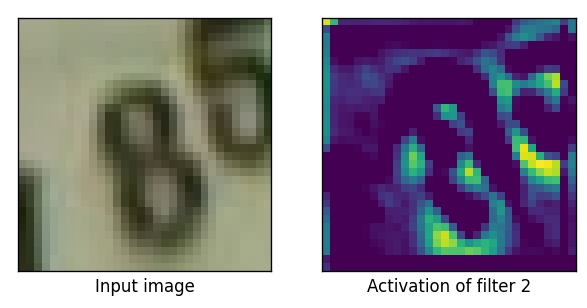

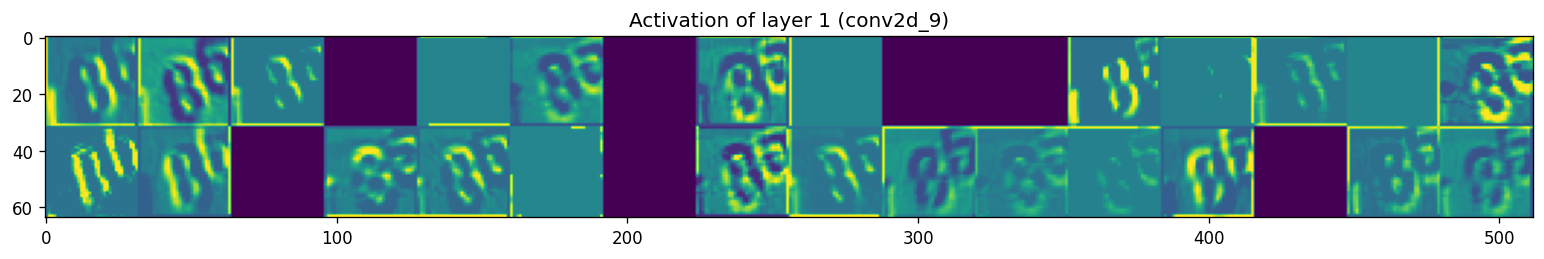

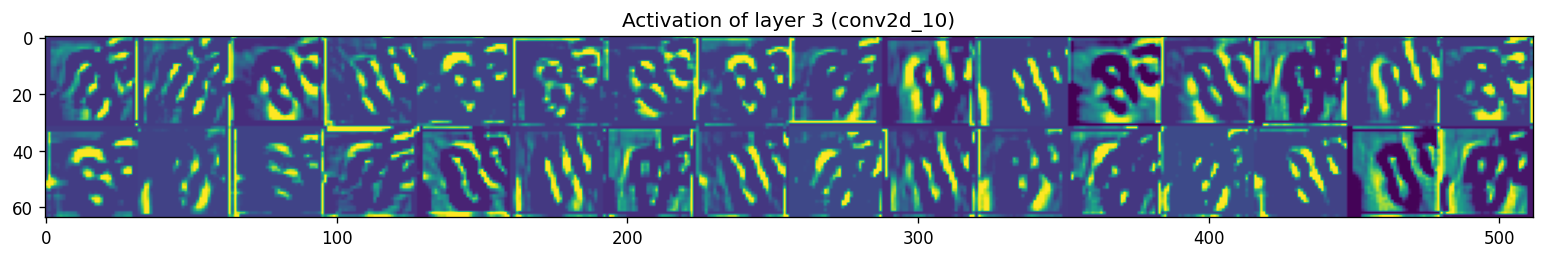

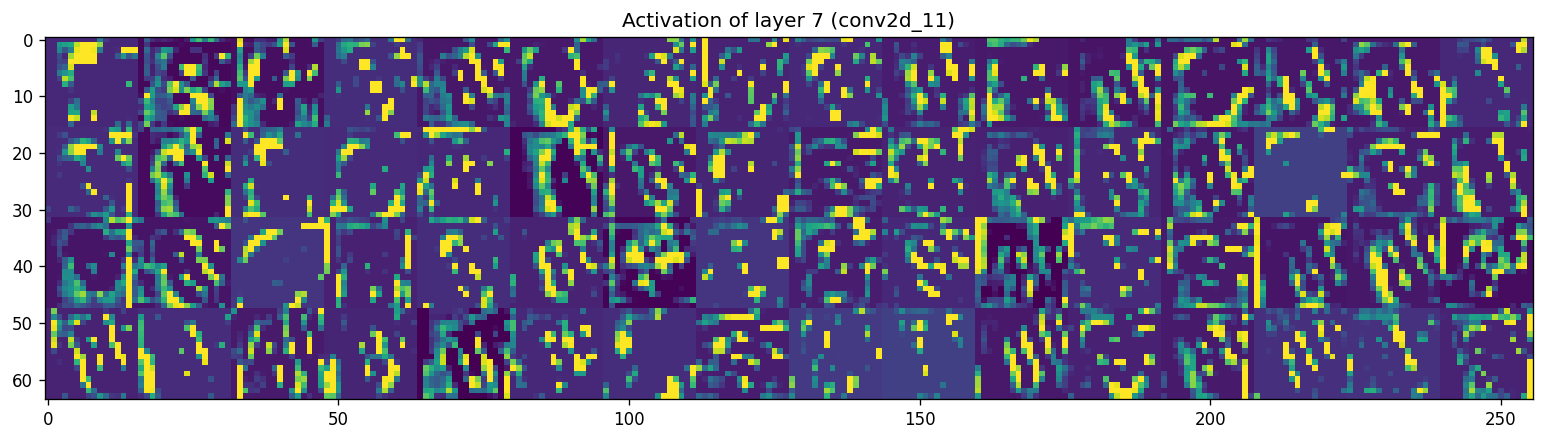

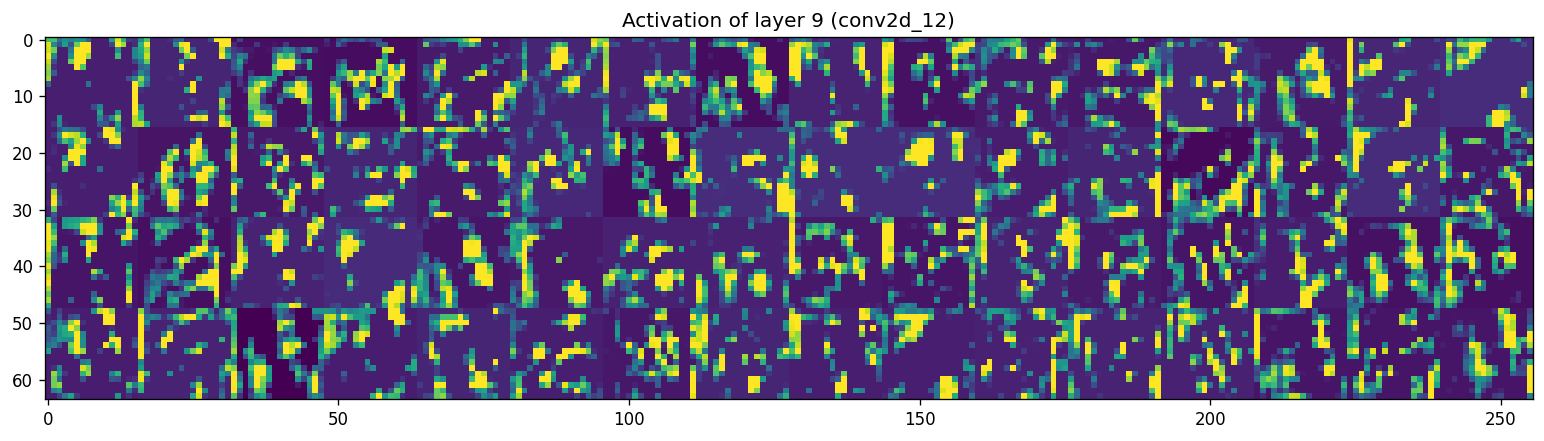

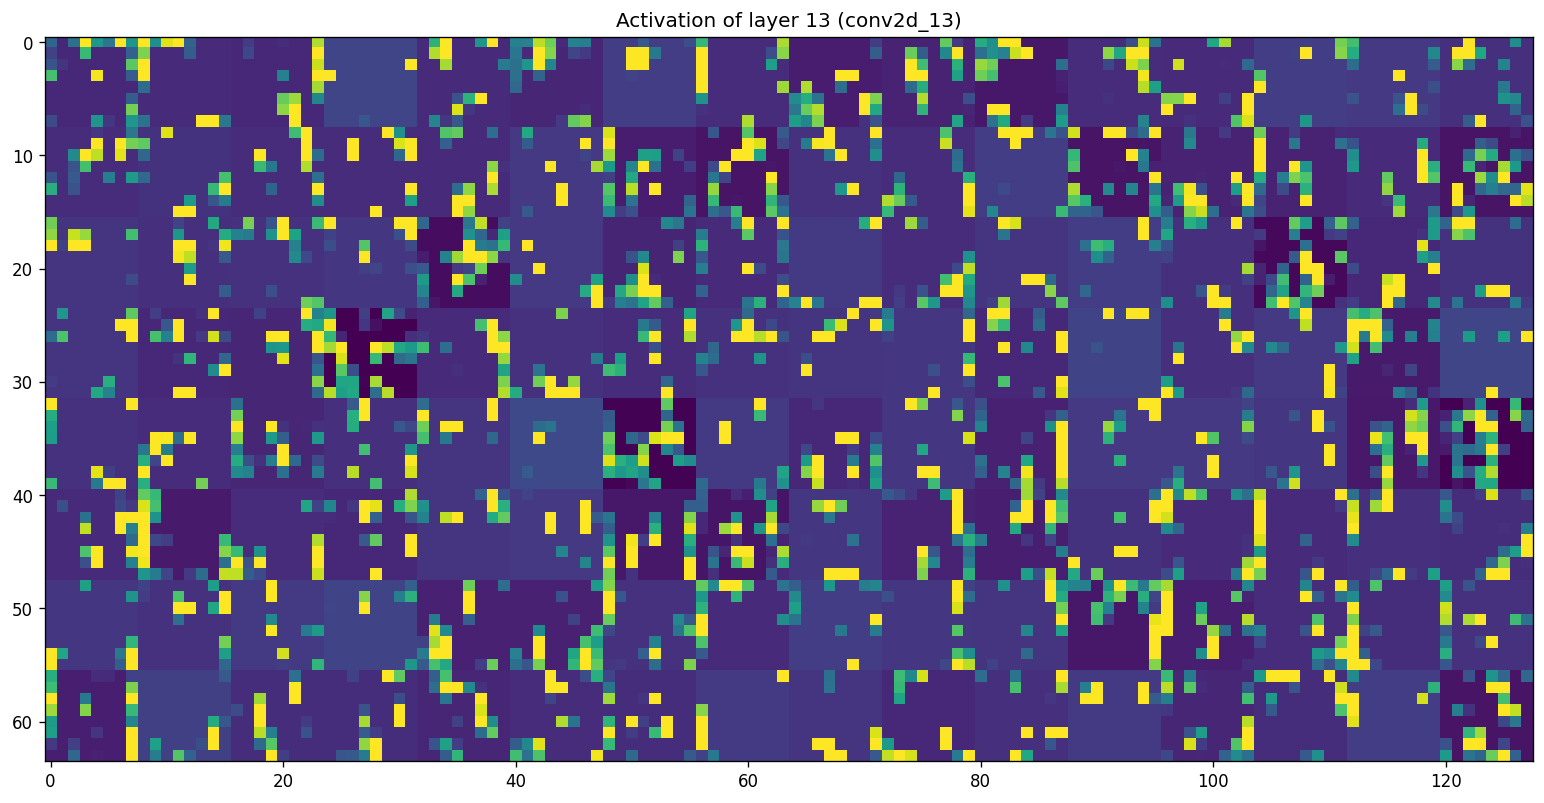

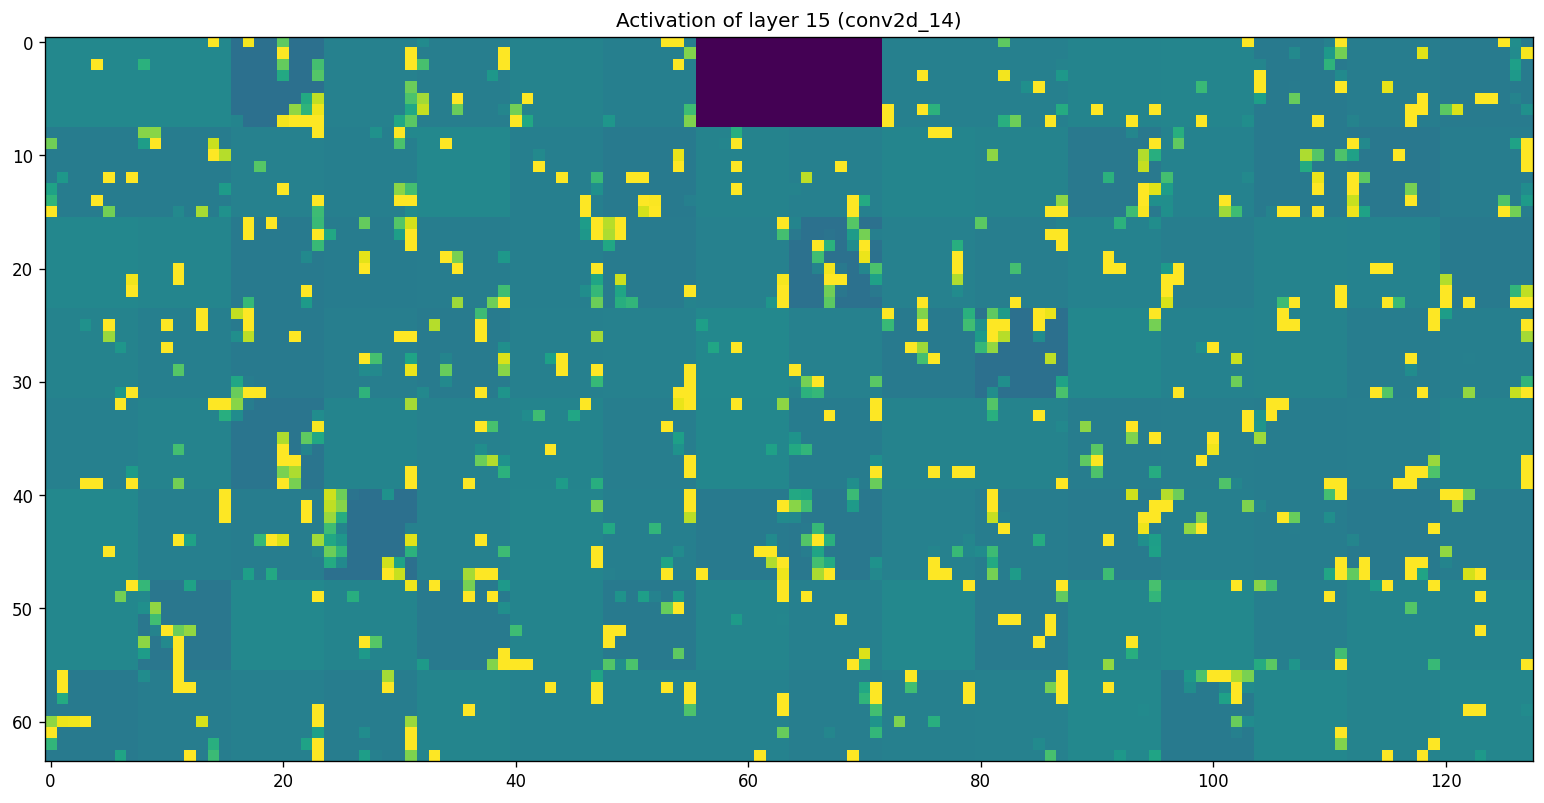

Answer is 496 characters long


In [22]:
from tensorflow.keras import models

def plot_activations_aux():
  model_novi = load_model_from_file(base_dir, "model_2_2", extension='.h5')

  img_tensor = rgb2gray(X_test)[0]
  img_tensor = np.expand_dims(img_tensor, axis=0) 
  img_tensor_1 = X_test[0]
  img_tensor_1 = np.expand_dims(img_tensor, axis=0) 

  # Extracts the outputs of the top 8 layers:
  layer_outputs = [layer.output for layer in model_novi.layers[:17]]
  # Creates a model that will return these outputs, given the model input:
  activation_model = models.Model(inputs=model_novi.input, outputs=layer_outputs)

  # This will return a list of 5 Numpy arrays:
  # one array per layer activation
  activations = activation_model.predict(img_tensor)

  # PLOTTING
  plt.rcParams['figure.dpi'] = 120
  first_layer_activation = activations[2]

  f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
  ax1.imshow(X_test[0])
  ax2.matshow(first_layer_activation[0, :, :, 2], cmap='viridis')
  ax1.set_xticks([])
  ax1.set_yticks([])
  ax2.set_xticks([])
  ax2.set_yticks([])
  ax1.set_xlabel('Input image')
  ax2.set_xlabel('Activation of filter 2');

  return activations
plot_activations_aux()

#########################################################################
def plot_activations_1(layer_index):
  # Now we plot all activations for all filters
  model_novi = load_model_from_file(base_dir, "model_2_2", extension='.h5')
  img_tensor = rgb2gray(X_test)[0]
  img_tensor = np.expand_dims(img_tensor, axis=0) 
  img_tensor_1 = X_test[0]
  img_tensor_1 = np.expand_dims(img_tensor, axis=0) 

  # Extracts the outputs of the top 16 layers:
  layer_outputs = [layer.output for layer in model_novi.layers[:17]]
  # Creates a model that will return these outputs, given the model input:
  activation_model = models.Model(inputs=model_novi.input, outputs=layer_outputs)

  # This will return a list of 5 Numpy arrays:
  # one array per layer activation
  activations = activation_model.predict(img_tensor)

  images_per_row = 16

  layer_names = []
  for layer in model_novi.layers[:17]:
      layer_names.append(layer.name)

  start = layer_index
  end = layer_index+1
  # Now let's display our feature maps
  for layer_name, layer_activation in zip(layer_names[start:end], activations[start:end]):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
      for row in range(images_per_row):
          channel_image = layer_activation[0,
                                          :, :,
                                          col * images_per_row + row]
          # Post-process the feature to make it visually palatable
          channel_image -= channel_image.mean()
          channel_image /= channel_image.std()
          channel_image *= 64
          channel_image += 128
          channel_image = np.clip(channel_image, 0, 255).astype('uint8')
          display_grid[col * size : (col + 1) * size,
                      row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title("Activation of layer {} ({})".format(layer_index+1,layer_name))
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

  plt.show()
  return None

def plot_activations():
  list_conv_layers = [0, 2, 6, 8, 12, 14]
  for j in list_conv_layers:
    plot_activations_1(j)
  return None
plot_activations()

answer_q_3_2 = """Looks like, that Layer1 tries to get rid of the back ground. Then Layer2
tries to find two circles in 8. Layer3 then tries to find left and right side of 8 
i.e. E+3"="8.  If we look at the activationsof conv layers we see the patterns starting 
to emerge, like circles and loops, but deeper we go, model becomes more abstract (to humans).
If ve check last convolutional layer, it is impossible to see patterns,
but for first layers we see some ideas. So yes model is learning some useful shapes."""

print("Answer is {} characters long".format(len(answer_q_3_2)))

### Question 3.3: Visualizing activations (4 points)
* Again, select the first example from the test set, and the trained model_2_2.
* Implement a function `plot_activation_map()` that builds and shows a class activation map for your last convolutional layer that highlights what the model is paying attention to when classifying the example.
* If possible, superimpossible the activation map over the image. If not, plot
them side by side. Implement a function 'plot_3_3' that returns the entire plot.

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


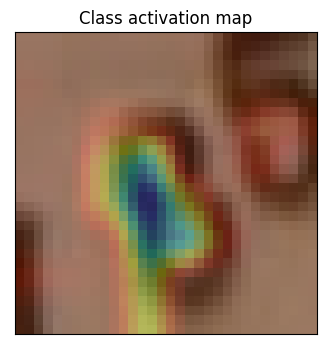

Looks like, that last convolutional layer is paying attention to upper and lower loop.
Seems consistent with activations in 3_2, where last convolutional layer 
is searching for circles, or dots and loops (round shapes).


In [23]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import cv2

def plot_3_3():
  tf.compat.v1.disable_eager_execution()
  first_ex = X_test[0] # shape is (32,32,3)
  first_ex_gray = rgb2gray([X_test[0]]) # Shape is (1,32,32,1)

  # Load the model
  model_novi_1 = load_model_from_file(base_dir, "model_2_2", extension='.h5')

  # We add a dimension to transform our array into a "batch" of size (1, 32, 32, 1)
  # Gray one is already in that shape
  x = np.expand_dims(first_ex, axis=0) # Shape (1,32,32,3)

  # Finally we preprocess the batch (this does channel-wise color normalization)
  # x = preprocess_input(x) # This is the "X_test[0]" entry in the prediction vector

  eight_output = model_novi_1.output[:, 7] # This is output for the class "8"
########################################################
  # The is the output feature map of the `dense_20` layer, the last dense layer in model_novi_1
  last_conv_layer = model_novi_1.get_layer('conv2d_14')
  
  # This is the gradient of the "african elephant" class with regard to
  # the output feature map of `block5_conv3`

  grads = K.gradients(eight_output, last_conv_layer.output)[0]

  # This is a vector of shape (512,), where each entry
  # is the mean intensity of the gradient over a specific feature map channel
  pooled_grads = K.mean(grads, axis=(0, 1, 2))

  # This function allows us to access the values of the quantities we just defined:
  # `pooled_grads` and the output feature map of `block5_conv3`,
  # given a sample image
  iterate = K.function([model_novi_1.input], [pooled_grads, last_conv_layer.output[0]])

  # These are the values of these two quantities, as Numpy arrays,
  # given our sample image of two elephants
  pooled_grads_value, conv_layer_output_value = iterate(first_ex_gray)

  # We multiply each channel in the feature map array
  # by "how important this channel is" with regard to the elephant class
  for i in range(128):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  # The channel-wise mean of the resulting feature map
  # is our heatmap of class activation

  heatmap = np.mean(conv_layer_output_value, axis=-1)

  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  # plt.matshow(heatmap)
  # plt.show()

  ######################################
  # We resize the heatmap to have the same size as the original image
  heatmap = cv2.resize(heatmap, (32, 32))

  # We convert the heatmap to RGB
  heatmap = np.uint8(255 * heatmap)

  # We apply the heatmap to the original image
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

  # 0.4 here is a heatmap intensity factor
  # superimposed_img = heatmap * 0.4 + img_tensor

  ##################################################
  # Now superimposing
  plt.rcParams['figure.dpi'] = 100
  plt.imshow(X_test[0])
  plt.imshow(heatmap, alpha=0.3)
  plt.title('Class activation map')
  plt.xticks([])
  plt.yticks([])
  plt.show()
  print('Looks like, that last convolutional layer is paying attention to upper and lower loop.')
  print('Seems consistent with activations in 3_2, where last convolutional layer ')
  print('is searching for circles, or dots and loops (round shapes).')
  return None
plot_3_3()

## Part 4. Transfer learning (10 points)
### Question 4.1 Fast feature extraction with VGG16 (5 points)
- Import the VGG16 model, pretrained on ImageNet. [See here](https://keras.io/applications/). Only import the convolutional part, not the dense layers.
- Implement a function 'build_model_4_1` that adds a dense layer to the convolutional base, and freezes the convolutional base. Consider unfreezing the last few convolutional layers and evaluate whether that works better.
- Train the resulting model on the *original* (colored) training data
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_4_1'.

Using TensorFlow backend.


<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f06001312e8> Trainable: False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f058ba85748> Trainable: False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f0597bee4e0> Trainable: False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f059b9d6828> Trainable: False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f059b9d69b0> Trainable: False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f0598446b70> Trainable: False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f05984559b0> Trainable: False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f059b35b358> Trainable: False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f059aa43a20> Trainable: False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f059b4fba20> Trainable: False
<tensorflow.python.keras.layers.poolin

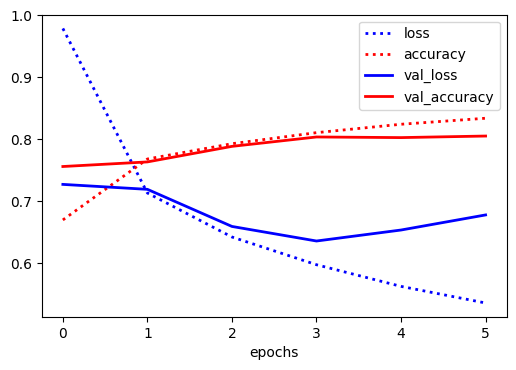

In [24]:
from tensorflow.keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

def build_model_4_1():
  VGG16_model = VGG16(include_top=False, weights='imagenet', input_shape=(32, 32, 3))
  model_4_1 = models.Sequential()
  # Only include convolutional layers
  model_4_1.add(VGG16_model)
  for layer in VGG16_model.layers[:-4]:
    layer.trainable = False

  # Sanity check of freezenes
  for layer in VGG16_model.layers:
    print(layer,'Trainable:', layer.trainable)

  # Add dense layer
  model_4_1.add(layers.Flatten())
  model_4_1.add(layers.Dense(1024, activation='relu'))

  model_4_1.add(layers.Dense(10, activation='softmax'))

  # Compile
  model_4_1.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])
  
  return model_4_1

###########################################################################
run_evaluation("model_4_1", build_model_4_1, (X_train, X_val, y_train, y_val), base_dir, 
               train=False, epochs=6, batch_size=32)
answer_q_4_1 = """Yes, unfreazing some layers works better in the sense of the accuracy, 
but takes longer to learn. Also only 15 epochs model starts overfitting. I tried different 
sizes of dense layers, but overfitting stays same. After 20 epoch model just goes wild
with the loss well over 3. We can only get to 0.82 val_acc. Also we train for only 10 epoch,
 after that model starts overfitting like crazy. Also I decided to train that model only for 
 6 epochs (to squeze at least some training in)."""

print("Answer is {} characters long".format(len(answer_q_4_1)))

### Question 4.2 Embeddings and pipelines (5 points)
- Generate embeddings of the original images by running them through the trained convolutional part of model_4_1 (without the dense layer) and returning the output. Embed the training and test data and store them to disk using the helper functions below. Implement a function `store_embeddings` that loads model_4_1 and stores all necessary embeddings to file. Make sure to run it once so that the embeddings are stored (and submitted).
- Implement a function 'generate_pipeline' that returns an scikit-learn pipeline. You can use any non-deep learning technique (eg. SVMs, RFs,...), and preprocessing technique. You can do model selection using the validation set. 
- Implement a function 'evaluate_pipeline' that evaluates a given pipeline on a given training and test set. 
- Implement a function 'evaluation_4_2' that evaluates your pipeline on the embedded training and test set (loaded from file) and returns the accuracy. 
- Describe what you did and what you observed. Report the obtained accuracy score. Can you beat your best model thus far?

In [25]:
import pickle
import gzip
import pandas as pd
import numpy as np
from keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, PowerTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.impute import SimpleImputer
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

def store_embedding(X, name):  
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'wb') as file_pi:
    pickle.dump(X, file_pi)

def load_embedding(name):
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'rb') as file_pi:
    return pickle.load(file_pi)

def store_embeddings():
  """ Stores all necessary embeddings to file
  """
  # Load the model from file
  loaded_model = load_model_from_file(base_dir, "model_4_1", extension='.h5')
  pretrained_model = loaded_model.get_layer('vgg16')

  # Our embeddings are predictions of our model (still have to get correct dimension)
  embd1 = pretrained_model.predict(X_train)
  embd2 = pretrained_model.predict(X_test)

  # Reshape our embeddings to 2D  vectors
  embd111 = embd1.reshape((len(X_train), 512)) 
  embd222 = embd2.reshape((len(X_test), 512)) 

  # Now we store both embeddings
  store_embedding(embd111, 'X_train_embeddings')
  store_embedding(embd222, 'X_test_embeddings')
  
  return pretrained_model
# store_embeddings()

def generate_pipeline():
  """ Returns an sklearn pipeline.
  """
  # Constructing a pipeline: 
  clf = RandomForestClassifier(random_state=1) 
  scaler = StandardScaler()
  pipeline = Pipeline(steps=[('scaler', scaler), ('clf', clf)])
  return pipeline

def evaluate_pipeline(pipeline, X_train, y_train, X_test, y_test):
  """ Evaluates the given pipeline, trained on the given embedded training set and 
      evaluated on the supplied embedded test set. Returns the accuracy score.
  """
  # Here we suppose that we are given the pipeline and embedded data 
  # X_train, y_train, X_test, y_test and we evaluate our pipeline

  pipeline.fit(X_train, y_train)
  pipe_output = pipeline.predict(X_test)
  
  # Scoring of our pipeline
  scores = pipeline.score(X_test, y_test)
  print('Scores for our pipeline:', scores)
  return scores
# evaluate_pipeline(generate_pipeline(), X_train, y_train, X_test, y_test)

def evaluation_4_2(X_train, y_train, X_test, y_test):
  """ Runs 'evaluate_pipeline' with embedded versions of the input data 
  and returns the accuracy.
  """
  # Retrive embeddings from file
  X_train_embed1 = load_embedding('X_train_embeddings')
  X_test_embed1 = load_embedding('X_test_embeddings')

  # If we want SVC we must transform y_train and y_test accordingly
  # y_train_SVC = [(np.argmax(i)+1)%10 for i in y_train]
  # y_test_SVC = [(np.argmax(i)+1)%10 for i in y_test]
  
  # Now we feed everything into evaluate_pipeline 
  return evaluate_pipeline(generate_pipeline(), X_train_embed1, y_train, X_test_embed1, y_test)
evaluation_4_2(X_train, y_train, X_test, y_test)

answer_q_4_2 = """I decidef for the Random Forest Classifier, because with standard scaling 
it worked best among others. Even in previous assignment it only gave us <0.85 accuracy, so we 
shouldnt expect too much here. I think in this case, where we had to build model
on top of the partially unfrozen VGG16 model it just doesnt work well, because it is 
trained on the different data . I think, that even with the finest tunning we 
wont be able to beat our best score (>90%). Scores are under 0.80."""
print("Pipeline:",generate_pipeline())
print("Answer is {} characters long".format(len(answer_q_4_2)))

Scores for our pipeline: 0.7748010877228321
Pipeline: Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=1,
                                        verbose=0, warm_start=Fals

In [0]:
#!python verify.py